# 1. Install the Required Packages

In [9]:
# !pip install numpy pandas matplotlib seaborn scikit-learn
# !pip install cmdstanpy

# !pip install arviz

In [1]:
import os
import sys
import pickle
from pathlib import Path
import arviz as az

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cmdstanpy
from cmdstanpy import CmdStanModel, cmdstan_path
# cmdstanpy.install_cmdstan()

import geopandas as gpd
from loadData import load_data

# import logging
# logging.getLogger("cmdstanpy").setLevel(logging.INFO)

C:\Users\Ameni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Import the Data

In [2]:
csv_file = './Data/rstb20160308supp1.csv'
lib_1 = './gadm41_LBR_shp/gadm41_LBR_2.shp'
gin_1 = './gadm41_GIN_shp/gadm41_GIN_2.shp'
sle_1 = './gadm41_SLE_shp/gadm41_SLE_2.shp'
lib_0 = './gadm41_LBR_shp/gadm41_LBR_0.shp'
gin_0 = './gadm41_GIN_shp/gadm41_GIN_0.shp'
sle_0 = './gadm41_SLE_shp/gadm41_SLE_0.shp'

## Load data
ebola = load_data(csv_file)
lib = load_data(lib_1, shapefile=True)
gin = load_data(gin_1, shapefile=True)
sle = load_data(sle_1, shapefile=True)
country_lib = load_data(lib_0, shapefile=True)
country_gin = load_data(gin_0, shapefile=True)
country_sle = load_data(sle_0, shapefile=True)
districts = pd.concat([lib, gin, sle], ignore_index=True)
country = pd.concat([country_lib, country_gin, country_sle], ignore_index=True)

Loading data from ./Data/rstb20160308supp1.csv...Please wait!
Done loading data from ./Data/rstb20160308supp1.csv!!!
 There are 33338 rows of observations.
 There are 16 columns
Loading data from ./gadm41_LBR_shp/gadm41_LBR_2.shp...Please wait!
Done loading data from ./gadm41_LBR_shp/gadm41_LBR_2.shp!!!
 There are 66 rows of observations.
 There are 14 columns
Loading data from ./gadm41_GIN_shp/gadm41_GIN_2.shp...Please wait!
Done loading data from ./gadm41_GIN_shp/gadm41_GIN_2.shp!!!
 There are 34 rows of observations.
 There are 14 columns
Loading data from ./gadm41_SLE_shp/gadm41_SLE_2.shp...Please wait!
Done loading data from ./gadm41_SLE_shp/gadm41_SLE_2.shp!!!
 There are 14 rows of observations.
 There are 14 columns
Loading data from ./gadm41_LBR_shp/gadm41_LBR_0.shp...Please wait!
Done loading data from ./gadm41_LBR_shp/gadm41_LBR_0.shp!!!
 There are 1 rows of observations.
 There are 3 columns
Loading data from ./gadm41_GIN_shp/gadm41_GIN_0.shp...Please wait!
Done loading data

In [3]:
ebola.head()

,Country,EpiCaseDef,FinalStatus,DateOnset,DateOnsetInferred,DateReport,DateOutcomeComp,DateHospitalCurrentAdmit,Age,CL_DistrictRes,HospitalizedEver,TreatmentCendreType,TreatmentCentre,delay.onset.hospitalisation,QuarterOnsetInferred,retrospective
0,Guinea,confirmed,Dead,2015-02-06,2015-02-06,2015-02-06,2015-02-06,NaN,45.0,FORECARIAH,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True
1,Guinea,confirmed,Dead,2015-03-02,2015-03-02,2015-03-07,2015-03-07,NaN,40.0,CONAKRY,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True
2,Guinea,confirmed,Dead,2015-03-15,2015-03-15,2015-03-17,2015-03-18,2015-03-18,0.0,FORECARIAH,Yes,ETU,Conakry 2,3.0,Jan - Mar 2015,False
3,Guinea,confirmed,Dead,2014-06-06,2014-06-06,2014-06-09,2014-06-16,2014-06-09,30.0,GUECKEDOU,Yes,ETU,Gueckedou 1,3.0,Apr - Jun 2014,False
4,Guinea,probable,Dead,2014-02-27,2014-02-27,2014-02-27,2014-03-03,NaN,46.0,GUECKEDOU,Yes,Unknown TC Type,NaN,NaN,Jan - Mar 2014,False


In [4]:
districts.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,LBR.1.1_1,LBR,Liberia,LBR.1_1,Bomi,NA,Klay,NA,NA,District,District,02,NA,"POLYGON ((-10.65347 6.67006, -10.65153 6.66552..."
1,LBR.1.2_1,LBR,Liberia,LBR.1_1,Bomi,NA,Mecca,NA,NA,District,District,04,NA,"POLYGON ((-10.65347 6.67006, -10.65926 6.69014..."
2,LBR.2.1_1,LBR,Liberia,LBR.2_1,Bong,NA,Fuamah,NA,NA,District,District,02,NA,"POLYGON ((-10.20627 6.80659, -10.20628 6.80142..."
3,LBR.2.2_1,LBR,Liberia,LBR.2_1,Bong,NA,Jorquelleh,NA,NA,District,District,04,NA,"POLYGON ((-9.35354 6.96628, -9.35357 6.94881, ..."
4,LBR.2.3_1,LBR,Liberia,LBR.2_1,Bong,NA,Kokoyah,NA,NA,District,District,06,NA,"POLYGON ((-9.49983 6.64371, -9.47651 6.64245, ..."


In [5]:
country.head()

,GID_0,COUNTRY,geometry
0,LBR,Liberia,"MULTIPOLYGON (((-7.56396 4.68852, -7.56542 4.6..."
1,GIN,Guinea,"MULTIPOLYGON (((-8.70727 7.63474, -8.70433 7.6..."
2,SLE,Sierra Leone,"MULTIPOLYGON (((-11.61903 6.99514, -11.61903 6..."


# 3. Data Preprocessing

## A. Impute missing DateOnset

### 1. Convert date datatypes

In [6]:
## Convert the date columns to date datatypes
date_columns = ["DateOnset", "DateOnsetInferred", "DateReport", "DateOutcomeComp", "DateHospitalCurrentAdmit"]
for col in date_columns:
    ebola[col] = pd.to_datetime(ebola[col], errors="coerce")

### 2. Check for missing values

In [8]:
## Check for missing values
print("Missing DateOnset:", ebola["DateOnset"].isna().sum())
print("Missing DateOnsetInferred:", ebola["DateOnsetInferred"].isna().sum())
print("Missing DateReport:", ebola["DateReport"].isna().sum())

Missing DateOnset: 6195
Missing DateOnsetInferred: 20
Missing DateReport: 5992


### 4. Calculate Reporting delays

This will help us impute the missing values correctly for each Country and probably for each District.

We will create a new column **Reporting Delay** and subtract **DateOnset** from the **DateReport** to give us the delay.

In [65]:
# Clean district names
ebola["CL_DistrictRes"] = ebola["CL_DistrictRes"].str.upper().str.strip()

# Calculate reporting delay where both dates are available
ebola["ReportingDelay"] = (ebola["DateReport"] - ebola["DateOnset"]).dt.days
delay_data = ebola.dropna(subset=["ReportingDelay"])

# Calculate median reporting delay by district
median_delay_by_district = delay_data.groupby(["Country", "CL_DistrictRes"])["ReportingDelay"].median()
median_delay_country = delay_data.groupby("Country")["ReportingDelay"].median()

# Calculate overall median delay as a fallback
overall_median_delay = delay_data["ReportingDelay"].median()

In [66]:
print("Median Reporting Delay (days) by Country and District:\n")
print(median_delay_by_district.head(10))
print("\nOverall Median Reporting Delay (days):", overall_median_delay)

Median Reporting Delay (days) by Country and District:

Country  CL_DistrictRes
Guinea   BEYLA             5.0
         BOFFA             5.0
         BOKE              4.0
         CONAKRY           5.0
         COYAH             5.0
         DABOLA            7.0
         DALABA            5.0
         DINGUIRAYE        7.0
         DUBREKA           5.0
         FARANAH           5.0
Name: ReportingDelay, dtype: float64

Overall Median Reporting Delay (days): 4.0


### 4. Impute the missing Dates for **DateOnset**

The **DateReport** is the date when the case was reported, which occurs after the onset of symptoms ( which is the **DateOnset**). In the 2014–2016 Ebola outbreak, reporting delays were common, often ranging from a few days to two weeks, depending on the country and phase of the outbreak.

We can impute **DateOnset** by subtracting an estimated reporting delay from DateReport. The delay will be estimated using cases where both DateOnset and DateReport are available.

In [ ]:
from imputeMissing import impute_value

ebola["OnsetDate"] = ebola.apply(
    lambda row: impute_value(row, median_delay_by_district, overall_median_delay, ebola),
    axis=1
)

In [79]:
ebola.head()

,Country,EpiCaseDef,FinalStatus,DateOnset,DateOnsetInferred,DateReport,DateOutcomeComp,DateHospitalCurrentAdmit,Age,CL_DistrictRes,HospitalizedEver,TreatmentCendreType,TreatmentCentre,delay.onset.hospitalisation,QuarterOnsetInferred,retrospective,ReportingDelay,OnsetDate
0,Guinea,confirmed,Dead,2015-02-06,2015-02-06,2015-02-06,2015-02-06,NaT,45.0,FORECARIAH,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True,0.0,2015-02-06
1,Guinea,confirmed,Dead,2015-03-02,2015-03-02,2015-03-07,2015-03-07,NaT,40.0,CONAKRY,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True,5.0,2015-03-02
2,Guinea,confirmed,Dead,2015-03-15,2015-03-15,2015-03-17,2015-03-18,2015-03-18,0.0,FORECARIAH,Yes,ETU,Conakry 2,3.0,Jan - Mar 2015,False,2.0,2015-03-15
3,Guinea,confirmed,Dead,2014-06-06,2014-06-06,2014-06-09,2014-06-16,2014-06-09,30.0,GUECKEDOU,Yes,ETU,Gueckedou 1,3.0,Apr - Jun 2014,False,3.0,2014-06-06
4,Guinea,probable,Dead,2014-02-27,2014-02-27,2014-02-27,2014-03-03,NaT,46.0,GUECKEDOU,Yes,Unknown TC Type,NaN,NaN,Jan - Mar 2014,False,0.0,2014-02-27


# 4. EDA

## A. View the data

In [81]:

ebola_confirmed = ebola[ebola["EpiCaseDef"] == "confirmed"]
ebola_confirmed.head()

,Country,EpiCaseDef,FinalStatus,DateOnset,DateOnsetInferred,DateReport,DateOutcomeComp,DateHospitalCurrentAdmit,Age,CL_DistrictRes,HospitalizedEver,TreatmentCendreType,TreatmentCentre,delay.onset.hospitalisation,QuarterOnsetInferred,retrospective,ReportingDelay,OnsetDate
0,Guinea,confirmed,Dead,2015-02-06,2015-02-06,2015-02-06,2015-02-06,NaT,45.0,FORECARIAH,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True,0.0,2015-02-06
1,Guinea,confirmed,Dead,2015-03-02,2015-03-02,2015-03-07,2015-03-07,NaT,40.0,CONAKRY,No,Not Hospitalised,NaN,NaN,Jan - Mar 2015,True,5.0,2015-03-02
2,Guinea,confirmed,Dead,2015-03-15,2015-03-15,2015-03-17,2015-03-18,2015-03-18,0.0,FORECARIAH,Yes,ETU,Conakry 2,3.0,Jan - Mar 2015,False,2.0,2015-03-15
3,Guinea,confirmed,Dead,2014-06-06,2014-06-06,2014-06-09,2014-06-16,2014-06-09,30.0,GUECKEDOU,Yes,ETU,Gueckedou 1,3.0,Apr - Jun 2014,False,3.0,2014-06-06
5,Guinea,confirmed,Alive,2015-06-26,2015-06-26,2015-06-29,2015-07-15,2015-06-30,45.0,BOKE,Yes,Hospital,Kindia 1,4.0,Apr - Jun 2015,False,3.0,2015-06-26


## B. Plot daily cases, deaths, and survivors

In [ ]:
# get cases by day
cases_by_day = ebola_confirmed.groupby("OnsetDate").size().reset_index(name="Cases")
cases_by_day["CumulativeCases"] = cases_by_day["Cases"].cumsum()

# get deaths by day
death_by_day = ebola_confirmed[ebola_confirmed["FinalStatus"] == "Dead"].groupby("OnsetDate").size().reset_index(name="FinalStatus")
death_by_day["CummulativeDeaths"] = death_by_day["FinalStatus"].cumsum()

# get survival(alive) by day
survive_by_day = ebola_confirmed[ebola_confirmed["FinalStatus"] == "Alive"].groupby("OnsetDate").size().reset_index(name="FinalStatus")
survive_by_day["CummulativeSurvival"] = survive_by_day["FinalStatus"].cumsum()

all_dates = pd.date_range(start=cases_by_day["OnsetDate"].min(), end=cases_by_day["OnsetDate"].max(), freq="D")
cases_by_day = cases_by_day.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
death_by_day = death_by_day.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
survive_by_day = survive_by_day.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})

cases_by_day["CumulativeCases"] = cases_by_day["Cases"].cumsum()
death_by_day["CummulativeDeaths"] = death_by_day["FinalStatus"].cumsum()
survive_by_day["CummulativeSurvival"] = survive_by_day["FinalStatus"].cumsum()

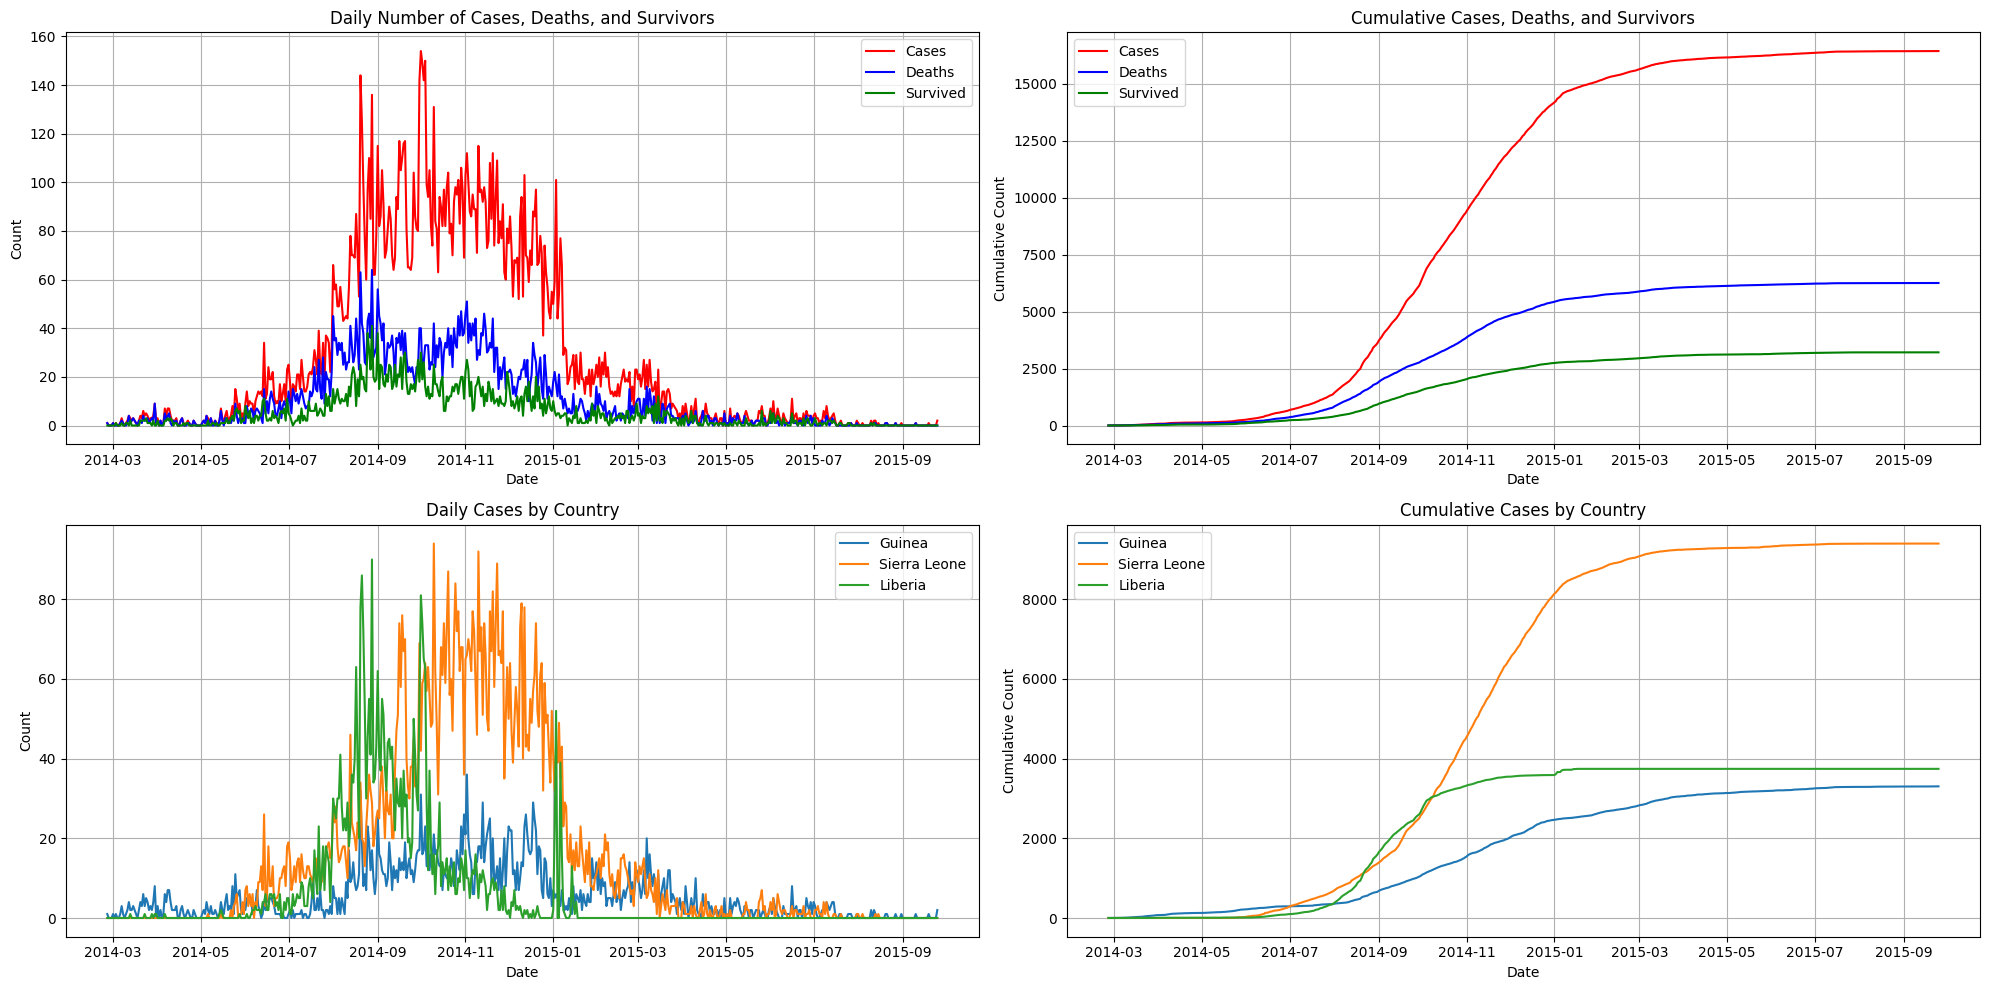

In [84]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(cases_by_day["DateOnset"], cases_by_day["Cases"], linestyle="-", color="red", label="Cases")
plt.plot(death_by_day["DateOnset"], death_by_day["FinalStatus"], linestyle="-", color="blue", label="Deaths")
plt.plot(survive_by_day["DateOnset"], survive_by_day["FinalStatus"], linestyle="-", color="green", label="Survived")
plt.title("Daily Number of Cases, Deaths, and Survivors")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(cases_by_day["DateOnset"], cases_by_day["CumulativeCases"], linestyle="-", color="red", label="Cases")
plt.plot(death_by_day["DateOnset"], death_by_day["CummulativeDeaths"], linestyle="-", color="blue", label="Deaths")
plt.plot(survive_by_day["DateOnset"], survive_by_day["CummulativeSurvival"], linestyle="-", color="green", label="Survived")
plt.title("Cumulative Cases, Deaths, and Survivors")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
for country in ebola_confirmed["Country"].unique():
    country_data = ebola_confirmed[ebola_confirmed["Country"] == country].groupby("OnsetDate").size().reset_index(name="Cases")
    country_data = country_data.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
    plt.plot(country_data["DateOnset"], country_data["Cases"], linestyle="-", label=country)
plt.title("Daily Cases by Country")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
for country in ebola_confirmed["Country"].unique():
    country_data = ebola_confirmed[ebola_confirmed["Country"] == country].groupby("OnsetDate").size().reset_index(name="Cases")
    country_data = country_data.set_index("OnsetDate").reindex(all_dates, fill_value=0).reset_index().rename(columns={"index": "DateOnset"})
    country_data["CumulativeCases"] = country_data["Cases"].cumsum()
    plt.plot(country_data["DateOnset"], country_data["CumulativeCases"], linestyle="-", label=country)
plt.title("Cumulative Cases by Country")
plt.xlabel("Date")
plt.ylabel("Cumulative Count")
plt.legend()
plt.grid(True)

plt.tight_layout()
# plt.savefig("./images/cases_death_survival_by_country.png", bbox_inches="tight")
plt.show()

## C. Summary statistics

In [85]:
print(cases_by_day.describe())

                 DateOnset       Cases  CumulativeCases
count                  578  578.000000       578.000000
mean   2014-12-10 12:00:00   28.449827      9584.927336
min    2014-02-25 00:00:00    0.000000         1.000000
25%    2014-07-19 06:00:00    2.000000      1030.750000
50%    2014-12-10 12:00:00    9.000000     12745.500000
75%    2015-05-03 18:00:00   53.000000     16171.250000
max    2015-09-25 00:00:00  154.000000     16444.000000
std                    NaN   36.513644      6885.345576


## D. Spatial visualization

AttributeError: 'str' object has no attribute 'boundary'

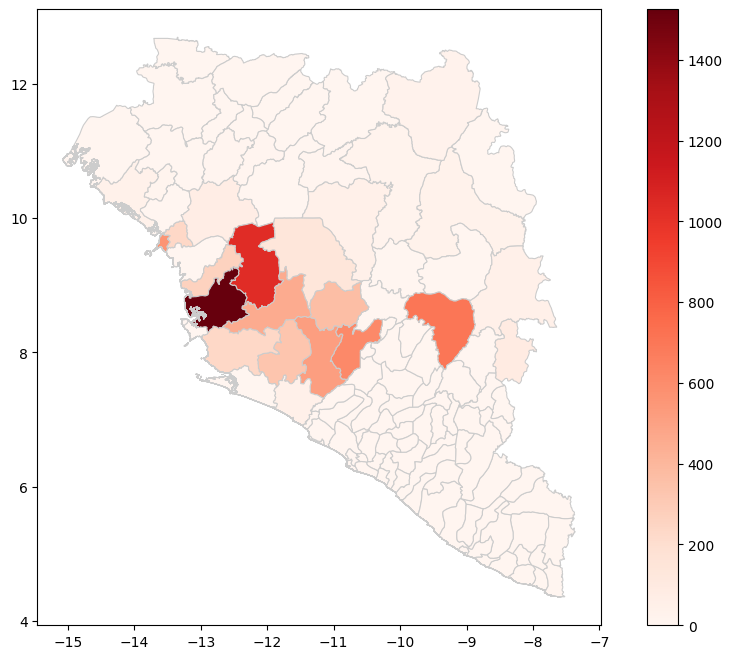

In [86]:
district_cases = ebola_confirmed.groupby("CL_DistrictRes").size().reset_index(name="TotalCases")
districts["NAME_2"] = districts["NAME_2"].str.upper()
district_cases["CL_DistrictRes"] = district_cases["CL_DistrictRes"].str.upper()
districts = districts.merge(district_cases, left_on="NAME_2", right_on="CL_DistrictRes", how="left")
districts["TotalCases"] = districts["TotalCases"].fillna(0)

fig, ax = plt.subplots(figsize=(12, 8))
districts.plot(column="TotalCases", cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
country.boundary.plot(ax=ax, color="black", linewidth=1)
plt.title("Total Ebola Cases by District (2014–2016)")
plt.axis("off")
# plt.savefig("./images/cases_by_district.png", bbox_inches="tight")
plt.show()

# 5. Prepare Data for SEIR Model

In [ ]:
patch_names = ["Guinea", "Liberia", "Sierra_Leone"]
n_patches = len(patch_names)
start_date = ebola_confirmed["OnsetDate"].min()
end_date = ebola_confirmed["OnsetDate"].max()
weeks = pd.date_range(start=start_date, end=end_date, freq="W-MON")
T = len(weeks) - 1

I_obs = np.zeros((T, n_patches))
for i, country in enumerate(patch_names):
    country_data = ebola_confirmed[ebola_confirmed["Country"] == country]
    weekly_cases = country_data.groupby(pd.Grouper(key="OnsetDate", freq="W-MON")).size()
    weekly_cases = weekly_cases.reindex(weeks[:-1], fill_value=0)
    I_obs[:, i] = weekly_cases.values

time = np.arange(1, T + 1)
data_plot = pd.DataFrame(I_obs, columns=patch_names)
data_plot["Time"] = time
data_plot = data_plot.melt(id_vars="Time", var_name="Patch", value_name="Cases")

plt.figure(figsize=(10, 6))
sns.lineplot(data=data_plot, x="Time", y="Cases", hue="Patch")
plt.title("Weekly New Ebola Cases (Confirmed)")
plt.xlabel("Week")
plt.ylabel("New Cases")
plt.grid(True)
plt.show()

# Compile the Model